# Import Library

In [1488]:
# Import Modul Pembantu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Modul Keras dari TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras import datasets
import tensorflow_datasets as tfds

# Import Modul SKlearn
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# Reading Dataset CO2 Emission

In [1489]:
data_clean = pd.read_csv('CO2 Emissions_Canada.csv')

In [1490]:
data_clean.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [1491]:
data_clean.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

# Data Splitting

In [1492]:
X = data_clean[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)',
                'Fuel Consumption Comb (mpg)']]
Y = data_clean[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)',
                'Fuel Consumption Comb (mpg)']]

In [1493]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1 , random_state = 0)

In [1494]:
X_train.shape

(6646, 6)

In [1495]:
X_test.shape

(739, 6)

In [1496]:
Y_train.shape

(6646, 6)

In [1497]:
Y_test.shape

(739, 6)

# Membuat Model

In [1498]:
model_data = Sequential()

### Membuat Input Layer

In [1499]:
model_data.add(Dense(512, activation='relu', input_dim = 6))

### Membuat Hidden Layer

In [1500]:
model_data.add(Dense(256, activation='relu'))
model_data.add(Dense(128, activation='relu'))

### Membuat Output Layer

In [1501]:
model_data.add(Dense(6, activation='sigmoid'))

# Model Summary

In [1502]:
model_data.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_259 (Dense)           (None, 512)               3584      
                                                                 
 dense_260 (Dense)           (None, 256)               131328    
                                                                 
 dense_261 (Dense)           (None, 128)               32896     
                                                                 
 dense_262 (Dense)           (None, 6)                 774       
                                                                 
Total params: 168,582
Trainable params: 168,582
Non-trainable params: 0
_________________________________________________________________


# Compile Data

In [1503]:
model_data.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1504]:
hasil = model_data.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/10
52/52 [==============================] - 1s 4ms/step - loss: -10878.2930 - accuracy: 0.9088 - val_loss: -57774.6953 - val_accuracy: 0.9269
Epoch 2/10
52/52 [==============================] - 0s 3ms/step - loss: -502907.2188 - accuracy: 0.9272 - val_loss: -1553090.1250 - val_accuracy: 0.9269
Epoch 3/10
52/52 [==============================] - 0s 3ms/step - loss: -5234503.5000 - accuracy: 0.9272 - val_loss: -11601782.0000 - val_accuracy: 0.9269
Epoch 4/10
52/52 [==============================] - 0s 3ms/step - loss: -25869156.0000 - accuracy: 0.9272 - val_loss: -46944684.0000 - val_accuracy: 0.9269
Epoch 5/10
52/52 [==============================] - 0s 3ms/step - loss: -84372680.0000 - accuracy: 0.9272 - val_loss: -134968960.0000 - val_accuracy: 0.9269
Epoch 6/10
52/52 [==============================] - 0s 3ms/step - loss: -213220720.0000 - accuracy: 0.9272 - val_loss: -312878080.0000 - val_accuracy: 0.9269
Epoch 7/10
52/52 [==============================] - 0s 3ms/step - loss:

In [1505]:
hasil.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

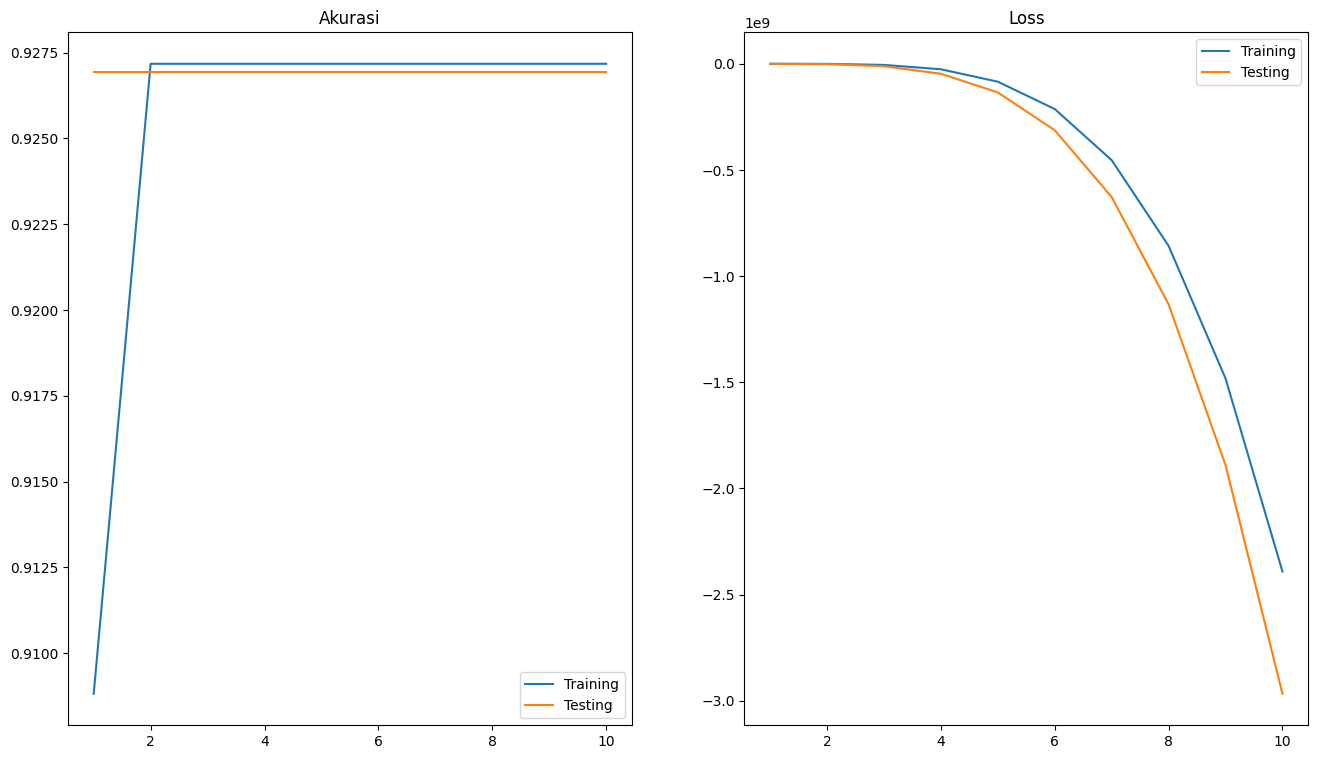

In [1506]:
plt.figure(figsize=(16,9))

epochs_run = [i+1 for i in range(10)]

# Akurasi
plt.subplot(1,2,1)
plt.plot(epochs_run, hasil.history['accuracy'], label='Training')
plt.plot(epochs_run, hasil.history['val_accuracy'], label='Testing')
plt.title("Akurasi")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs_run, hasil.history['loss'], label='Training')
plt.plot(epochs_run, hasil.history['val_loss'], label='Testing')
plt.title("Loss")
plt.legend()

plt.show()

# Evaluasi Skor

In [1507]:
score = model_data.evaluate(X_test, Y_test)
print("Loss :",score[0])
print("Training :",score[1])

24/24 [==============================] - 0s 826us/step - loss: -2966841088.0000 - accuracy: 0.9269
Loss : -2966841088.0
Training : 0.9269282817840576
